In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\PREKSHA\Downloads\Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [13]:
df = df.drop("CustomerID", axis=1)

In [14]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [15]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)
df_pca = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])

In [16]:
# Elbow Method
inertias = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df)
    inertias.append(model.inertia_)

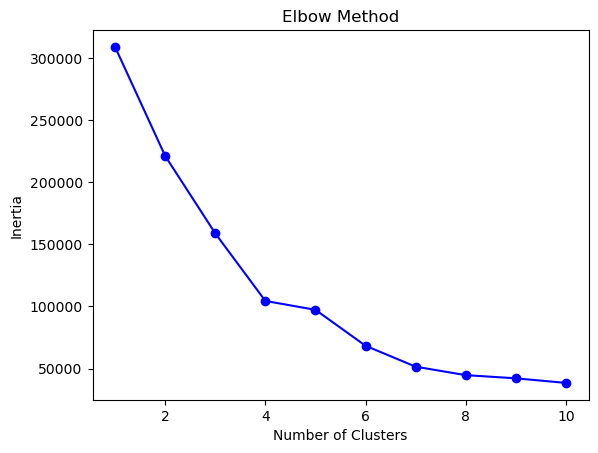

In [17]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [20]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

Silhouette Score: 0.41


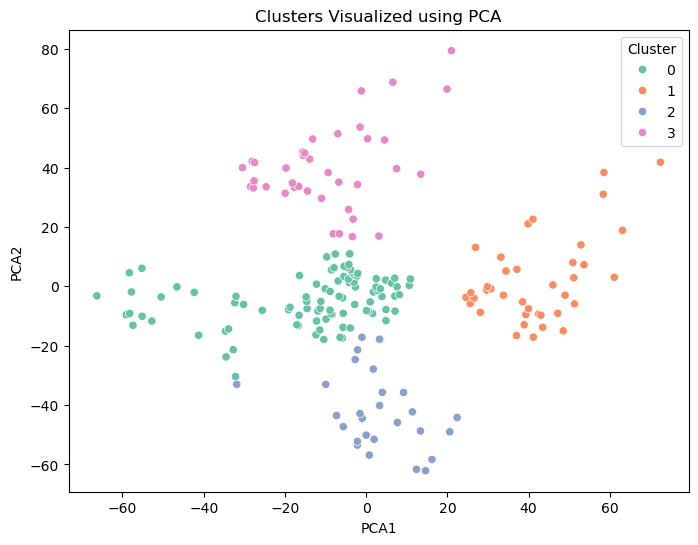

In [21]:
score = silhouette_score(df.drop("Cluster", axis=1), df["Cluster"])
print(f"Silhouette Score: {score:.2f}")

df_pca['Cluster'] = df['Cluster']
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Clusters Visualized using PCA")
plt.show()